In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import warnings

In [16]:
diabetes = pd.DataFrame(pd.read_csv('./diabetes.csv'))

X = diabetes.values[:,0:8]
Y = diabetes.values[:,8]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(537, 8) (231, 8) (537,) (231,)


In [17]:
sc_X = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.fit_transform(X_test)
model = SVC(C=1, kernel='linear')
model.fit(X_train_sc, Y_train)
predicted = model.predict(X_test_sc)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       157
         1.0       0.65      0.54      0.59        74

    accuracy                           0.76       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231



In [18]:
model_names = ['linear', 'rbf', 'poly', 'sigmoid']
accuracy = []

max_accuracy = 0
highest_name = ''

for name in model_names:
    warnings.filterwarnings('ignore')
    sc_X = StandardScaler()
    X_train_sc = sc_X.fit_transform(X_train)
    X_test_sc = sc_X.fit_transform(X_test)
    model = SVC(C=1, kernel=name)
    model.fit(X_train_sc, Y_train)
    predicted = model.predict(X_test_sc)
    report_data = classification_report(Y_test, predicted, output_dict=True)
    data = pd.DataFrame(report_data)
    accuracy.append(data.values[2,3])
    if data.values[2,3] > max_accuracy:
        report = classification_report(Y_test, predicted)
        cm = confusion_matrix(Y_test, predicted)
        max_accuracy = data.values[2,3]
        highest_name = name
        
print("The kernel, ", highest_name, "have the highest accuracy of ", max_accuracy)
print("Classification Report: \n", report)

The kernel,  linear have the highest accuracy of  0.7082280765066763
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       157
         1.0       0.65      0.54      0.59        74

    accuracy                           0.76       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231



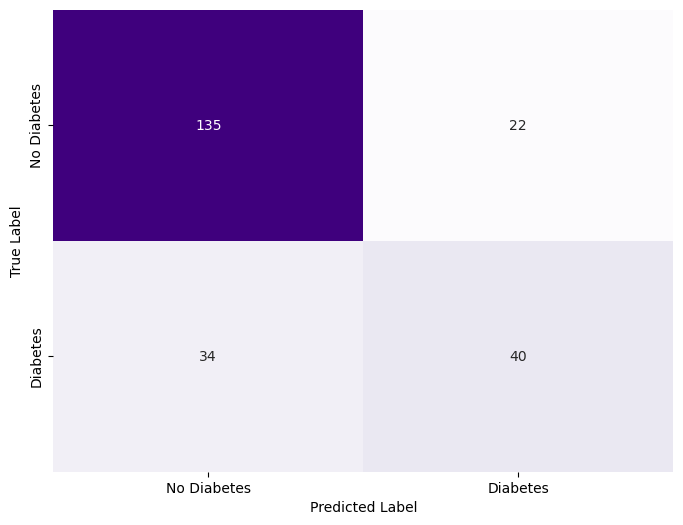

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", cbar=False, 
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Text(0.5, 1.0, 'Accuracy over different kernels.')

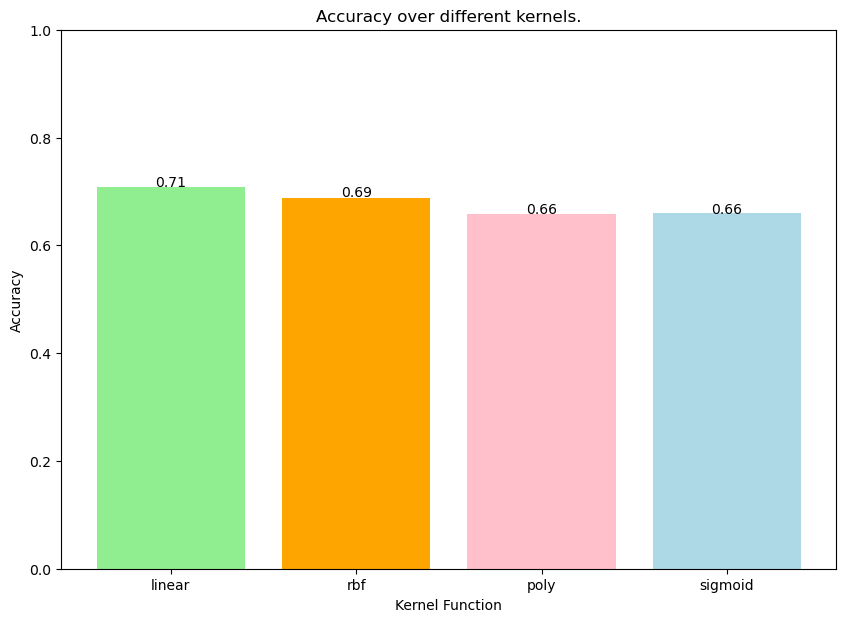

In [20]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

plt.figure(figsize=(10,7))
plt.bar(model_names, accuracy, color=['lightgreen', 'orange', 'pink', 'lightblue'])
addlabels(model_names, list(np.around(np.array(accuracy),2)))
plt.ylim(0,1)
plt.xlabel('Kernel Function')
plt.ylabel('Accuracy')
plt.title('Accuracy over different kernels.')